# Mobile HEALTH
<br>
**Источник:** <br>https://www.kaggle.com/
<br>
<br>
**Цели:** <br>● провести предобработку данных, для последующего их удобного анализа
<br>
● проанализировать данные в соответсвии с имеющимися задачами
<br>
<br>
**Задачи:** <br>● Построить гистограммы для alx, aly, alz, glx, gly, glz, arx, ary, arz, grx, gry, grz.
<br>
● Построить диаграммы размаха для alx, aly, alz, glx, gly, glz, arx, ary, arz, grx, gry, grz.
<br>
<br>
**Входные данные:** <br>входные данные представляют собой файл csv, содержащий в себе информацию о движениях тела и показателях жизнедеятельности человека при выполнении нескольких физических упражнений.
<br>
<br>
**Используемые библиотеки:** <br>pandas
<br>numpy
<br>matplotlib.pyplot
<br>
<br>
Для начала импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import numpy as re
import matplotlib.pyplot as plt
import seaborn as sns

Считаем файл, запишем его в переменную df:

In [2]:
df = pd.read_csv("mhealth_raw_data.csv")

## Обзор данных

Выведем основную информацию о данных:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215745 entries, 0 to 1215744
Data columns (total 14 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   alx       1215745 non-null  float64
 1   aly       1215745 non-null  float64
 2   alz       1215745 non-null  float64
 3   glx       1215745 non-null  float64
 4   gly       1215745 non-null  float64
 5   glz       1215745 non-null  float64
 6   arx       1215745 non-null  float64
 7   ary       1215745 non-null  float64
 8   arz       1215745 non-null  float64
 9   grx       1215745 non-null  float64
 10  gry       1215745 non-null  float64
 11  grz       1215745 non-null  float64
 12  Activity  1215745 non-null  int64  
 13  subject   1215745 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 129.9+ MB


Данные представляют из себя 1215745 строк и 14 столбцов, причем первые 12 столбцов имеют типо **float**, 13 - **int**, 14 - **object**.
Описание данных:

alx - acceleration from the left-ankle sensor (X axis)
aly - acceleration from the left-ankle sensor (Y axis)
alz - acceleration from the left-ankle sensor (Z axis)
glx - gyro from the left-ankle sensor (X axis)
gly - gyro from the left-ankle sensor (Y axis)
glz - gyro from the left-ankle sensor (Z axis)
arx - acceleration from the right-lower-arm sensor (X axis)
ary - acceleration from the right-lower-arm sensor (Y axis)
arz - acceleration from the right-lower-arm sensor (Z axis)
grx - gyro from the right-lower-arm sensor (X axis)
gry - gyro from the right-lower-arm sensor (Y axis)
grz - gyro from the right-lower-arm sensor (Z axis)
Activity - corresponding activity
subject - volunteer number

Посмотрим как выглядят наши данные:

In [4]:
df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


Приведем заголовки столбцов к **snakecase**Ж

In [5]:
df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', "_").str.lower()
df.head()

/var/folders/rt/mvnmln8j70d9fmnh5b6pl1qr0000gn/T/ipykernel_28551/2269992297.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r'(?<!^)(?=[A-Z])', "_").str.lower()


,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.44902,-1.0103,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.44902,-1.0103,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.44902,-1.0103,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.45686,-1.0082,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.45686,-1.0082,0.025862,0,subject1


Выведем количетсво пропусков:

In [6]:
df.isna().mean()

alx         0.0
aly         0.0
alz         0.0
glx         0.0
gly         0.0
glz         0.0
arx         0.0
ary         0.0
arz         0.0
grx         0.0
gry         0.0
grz         0.0
activity    0.0
subject     0.0
dtype: float64

Пропусков нет. Проверим на явные дубликаты:

In [7]:
df.duplicated().sum()

0

Дубликатов нет. Поймем, что последние 2 столбика нем не нужны. Удалим их:

In [8]:
df = df.drop(["activity"], axis=1)
df = df.drop(["subject"], axis=1)

Предобработка закончена.
## Построение гистограмм
Построим 12 гистограмм. Для значений каждого из столбиков запустим функцию **"painting"**

/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/anastasiakula/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level f

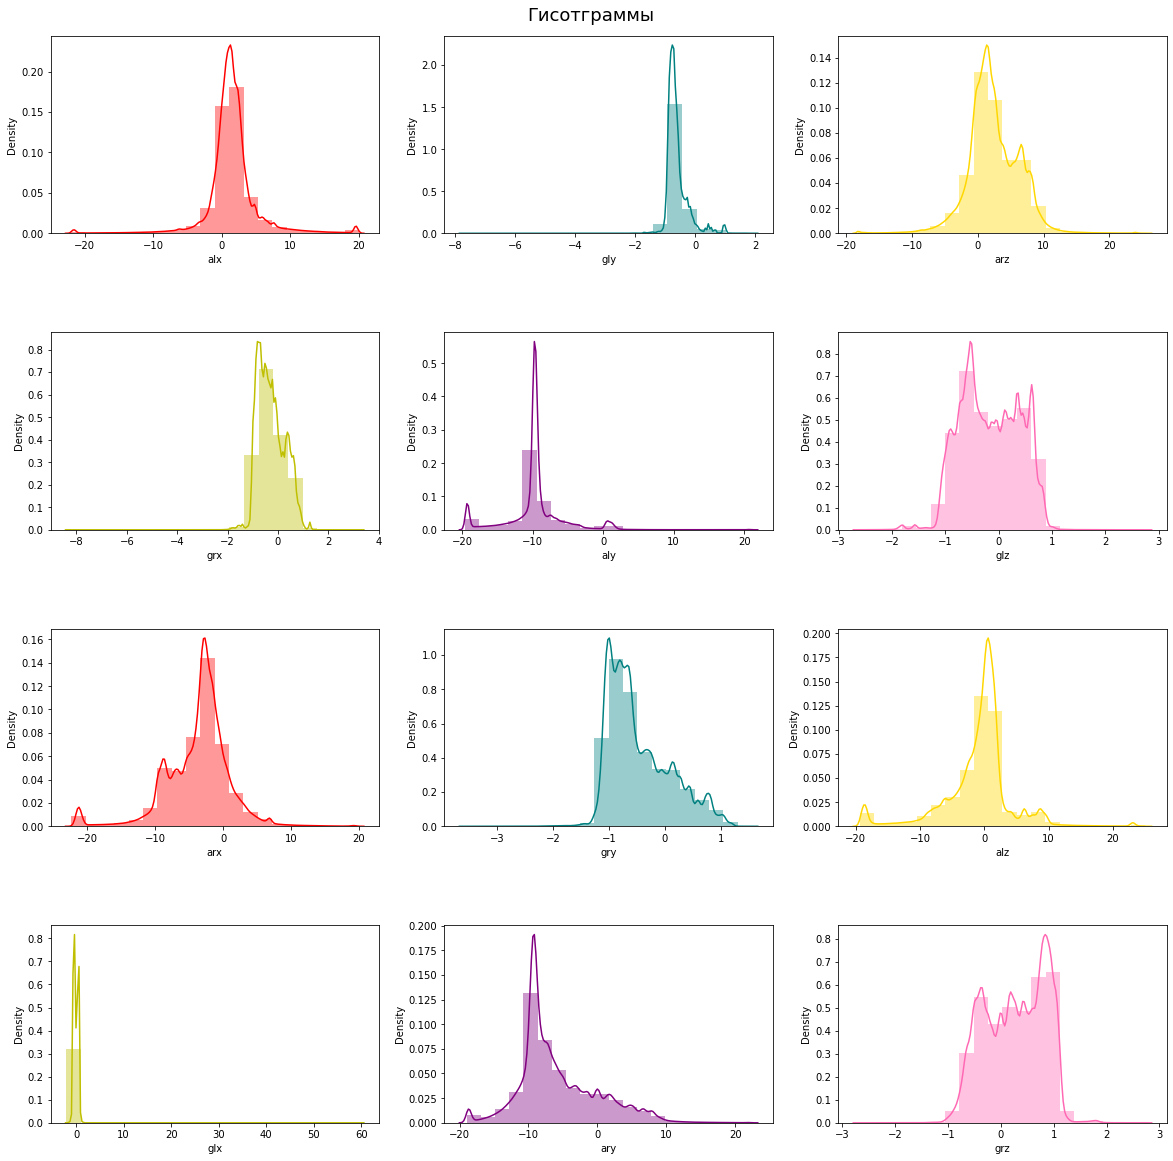

In [9]:
fig, axs = plt.subplots(4, 3, figsize=(20, 20))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Гисотграммы", fontsize=18, y=0.9)

def painting(column: str, col: str, axs: list):
    """
    Функция получает на вход столбец, цвет и позицию, рисует гистограмму по полученным данным
    """
    sns.distplot( a = df[column], hist = True, kde = True, rug = False, bins=20,  color= col, ax = axs)
    

column = df.columns 
col = ["red", "purple", "gold", "y", "teal", "hotpink","red", "purple", "gold", "y", "teal", "hotpink"]
counter = 0
for i in range(len(column)): 
    
    painting(column[i], col[i], axs[i%4, counter%3])
    counter += 1

                                    
                                    
                                    


Определим тип каждой гистограммы:
alx - обычный тип
aly - гистограмма вытянутая вправо
alz - двугровая гистограмма
glx - двугровая гистограмма
gly - гистограмма с двумя отдельными островками
glz - двугровая гистограмма
arx - гистограмма с одним отдельным островком
ary - гистограмма вытянутая вправо
arz - гистограмма с одним отдельным островком
grx - гистограмма в виде обрыва
gry - гистограмма вытянутая вправо
grz - плато
## Построение диаграмм размаха

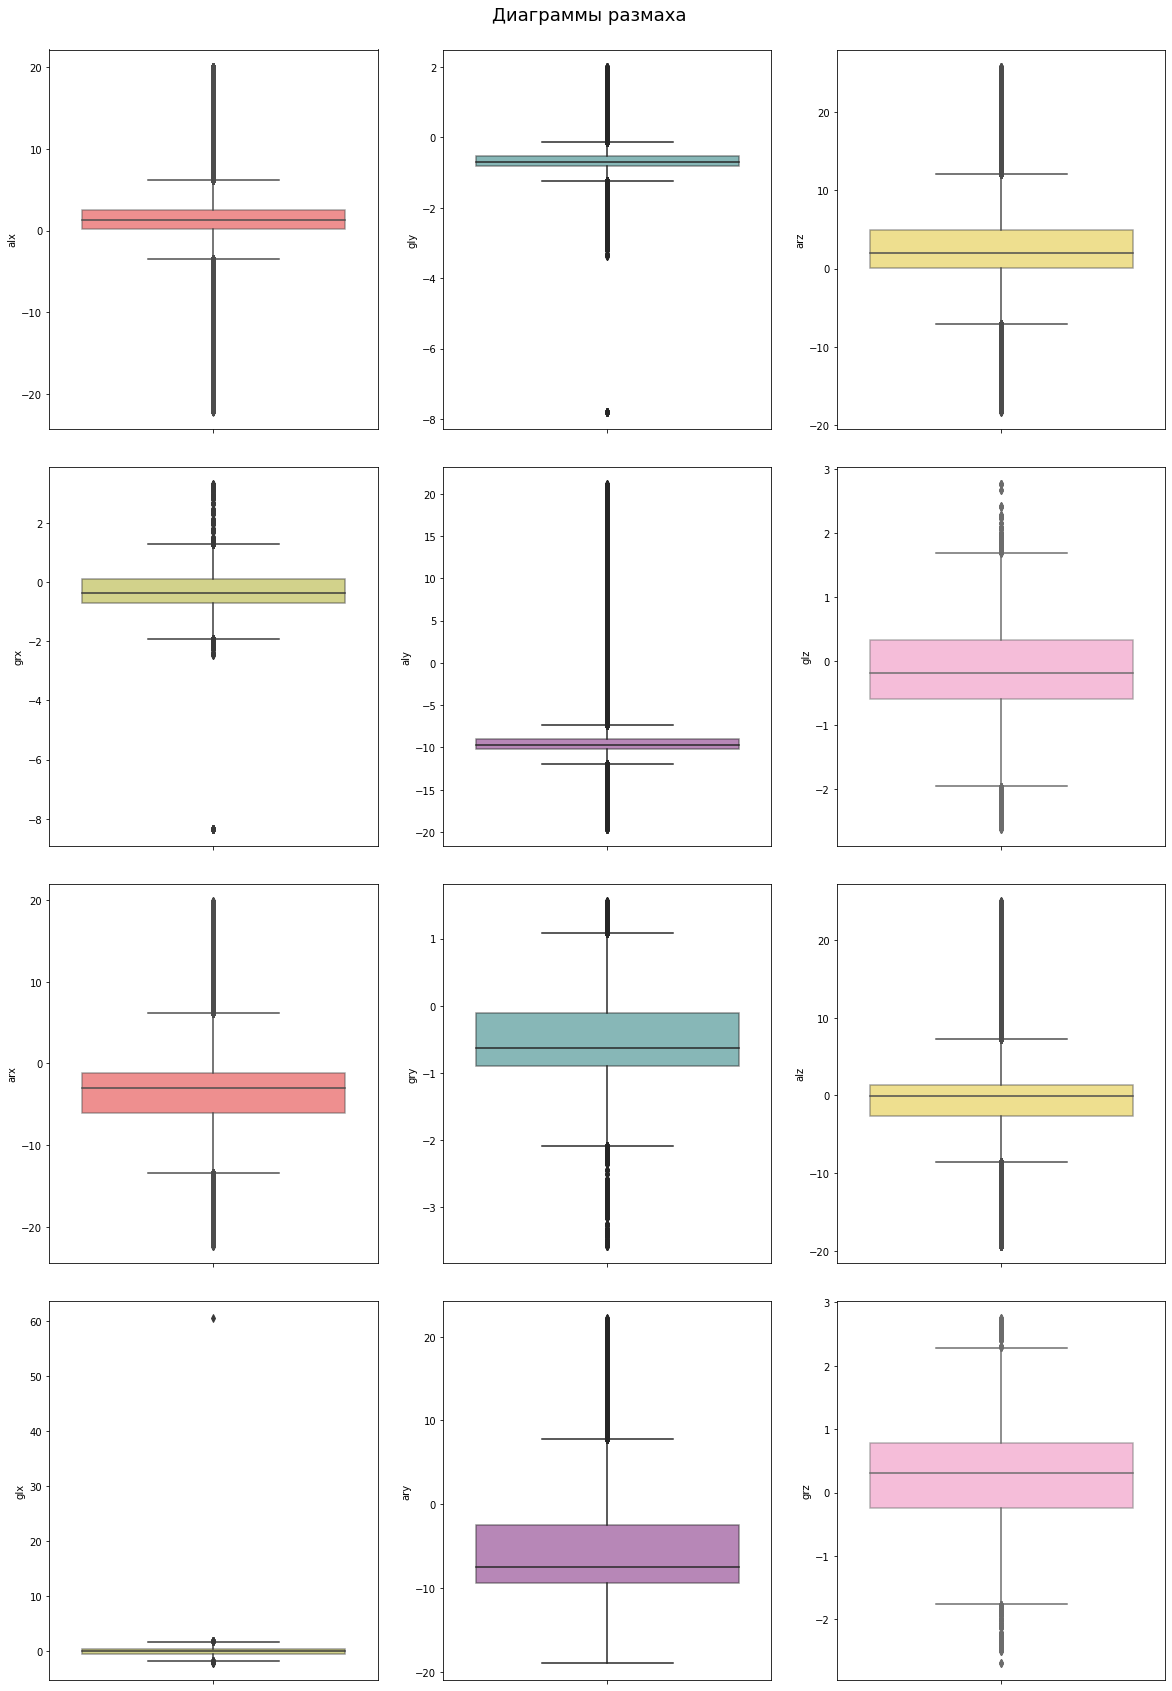

In [10]:
fig, axs = plt.subplots(4, 3, figsize=(20, 30))
plt.subplots_adjust(hspace=0.1)
fig.suptitle("Диаграммы размаха", fontsize=18, y=0.9)

def painting(column, col, axs):
    """
    Функция получает на вход столбец, цвет и позицию, рисует гистограмму по полученным данным
    """
    sns.boxplot(y=df[column], color= col, ax = axs,  boxprops=dict(alpha=.5))
    
    

counter = 0
for i in range(len(column)): 
    painting(column[i], col[i], axs[i%4, counter%3])
    counter += 1
    

                         

Заметим, что выбросы есть во всех диаграммах. Посчитаем долю выбросов для каждого столбца:

In [11]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
i = q3 - q1
print(((df < (q1 - 1.5 * i)) | (df > (q3 + 1.5 * i))).sum())

alx    124680
aly    384098
alz    150936
glx        48
gly     96630
glz       697
arx     58069
ary     27969
arz     24804
grx      1053
gry      4905
grz       308
dtype: int64


<div class="alert alert-block alert-danger">
<b>Обрати внимание🤔:</b> Доля выбросов 124680? Это в процентах? Как такое может быть?
</div>

## Вывод
В процессе работы я произвела обзор и предобработку данных. После этого я построила гистограммы и диаграммы размаха по столбцам имеющегося датафрейма, используя библиотеку . Для гистограмм я попыталась определить их тип. Для диаграмм размаха я посчитала долю выбросов в каждом столбце. Таким образом я изучила 2 новых вида диаграмм: гистограмму и диаграмму размаха.